# **Enterprise Challenge-Sprint2- Ingredion**

---
**Introdução**

Nesta etapa do projeto, realizamos o pré-processamento dos dados de imagens de satélite (NDVI) e produtividade agrícola para análise exploratória.

O objetivo é identificar padrões sazonais no índice de vegetação (NDVI) que possam explicar variações na produtividade da soja no estado do Mato Grosso entre 2019 e 2023.


**Objetivos da Análise**


- Organizar os dados históricos de NDVI e produtividade agrícola.
- Tratar e estruturar os dados para uso em modelos preditivos.
- Explorar padrões sazonais na série temporal do NDVI.
- Avaliar a correlação entre o NDVI e a produtividade da soja.

## **Segmentação de Áreas de Cultivo**

---
Para destacar apenas as áreas agrícolas de interesse, utilizamos o sistema SATVeg da Embrapa.

A segmentação foi realizada manualmente, por meio do desenho de polígonos sobre as áreas produtivas de cada fazenda (Sorriso, Nova Mutum e Campo Novo do Parecis). Isso nos permitiu extrair séries temporais de NDVI específicas para as áreas de soja, evitando contaminação com vegetação nativa e áreas urbanas.



**Exemplos de Segmentação das Áreas de Cultivo**

Abaixo, apresentamos exemplos dos polígonos desenhados sobre as lavouras, que foram utilizados para extrair os dados de NDVI para cada fazenda.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Imagens_SATVeg.zip to Imagens_SATVeg (1).zip


In [ ]:
import zipfile
import os

# Extrair o conteúdo do arquivo zipado
zip_path = "/content/Imagens_SATVeg.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/imagens_satveg")

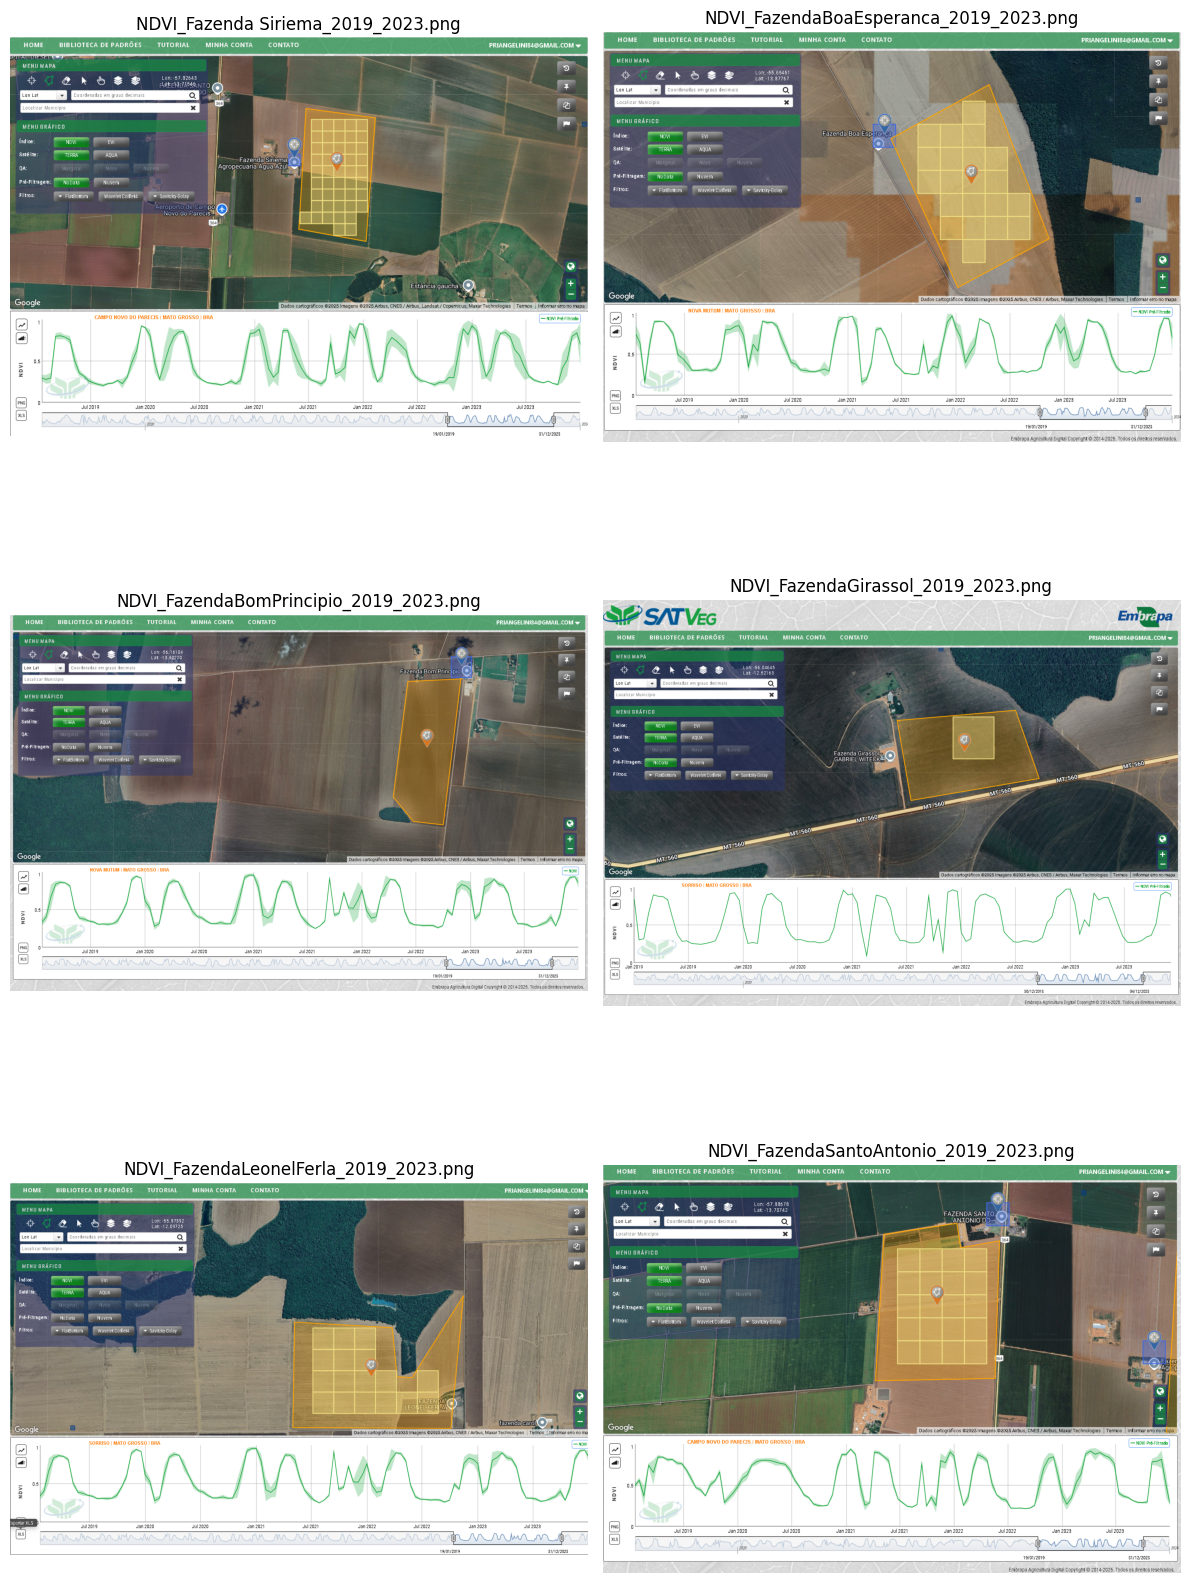

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os

# Função para filtrar imagens válidas
def filtrar_imagens(pasta):
    return [
        img for img in sorted(glob.glob(f"{pasta}/*.png"))
        if "._" not in os.path.basename(img) and not img.endswith(".png.png")
    ]

# Usar a função para pegar as imagens
image_paths = filtrar_imagens("/content/imagens_satveg")

# Definir quantas imagens por linha
imagens_por_linha = 2

# Calcular quantas linhas serão necessárias
linhas = (len(image_paths) + imagens_por_linha - 1) // imagens_por_linha

# Criar a figura
fig, axes = plt.subplots(linhas, imagens_por_linha, figsize=(12, 6*linhas))

# Deixar axes 2D sempre
axes = axes.flatten()

# Exibir cada imagem
for idx, img_path in enumerate(image_paths):
    img = mpimg.imread(img_path)
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_title(os.path.basename(img_path))

# Se sobrar espaço nos subplots, desliga os eixos vazios
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## **Análise Exploratória: Relação entre NDVI e Produtividade Agrícola**

---
Nesta seção, realizamos a análise exploratória dos dados extraídos do SATVeg, buscando identificar padrões sazonais no NDVI e entender sua relação com a produtividade agrícola da soja.

In [ ]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Upload do arquivo Excel
from google.colab import files
uploaded = files.upload()

# Leitura do arquivo
df_ndvi_prod_final = pd.read_excel(next(iter(uploaded.keys())))
df_ndvi_prod_final.head()

Saving Dados_NDVI_Produtividade_Unificado_FINAL.xlsx to Dados_NDVI_Produtividade_Unificado_FINAL (1).xlsx


,Fazenda,Município,Ano,Mês,NDVI_médio,NDVI_mínimo,NDVI_máximo,Produtividade_kg_ha
0,Fazenda Girassol,Sorriso,2019,1,0.57100,0.57100,0.57100,3540
1,Fazenda Girassol,Sorriso,2019,2,0.48520,0.48520,0.48520,3540
2,Fazenda Girassol,Sorriso,2019,3,0.88975,0.88975,0.88975,3540
3,Fazenda Girassol,Sorriso,2019,4,0.85435,0.85435,0.85435,3540
4,Fazenda Girassol,Sorriso,2019,5,0.48745,0.48745,0.48745,3540


**Configurações dos Gráficos**

In [ ]:
# Estilo dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

**Gráfico 1: NDVI Médio ao longo dos Meses**

---

Neste gráfico, analisamos o valor médio mensal do NDVI entre 2019 e 2023, visando identificar a sazonalidade do vigor da vegetação ao longo do ciclo agrícola.

<ipython-input-13-bd9e88827f0d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_ndvi_prod_final, x="Mês", y="NDVI_médio", estimator='mean', ci=None, marker='o')


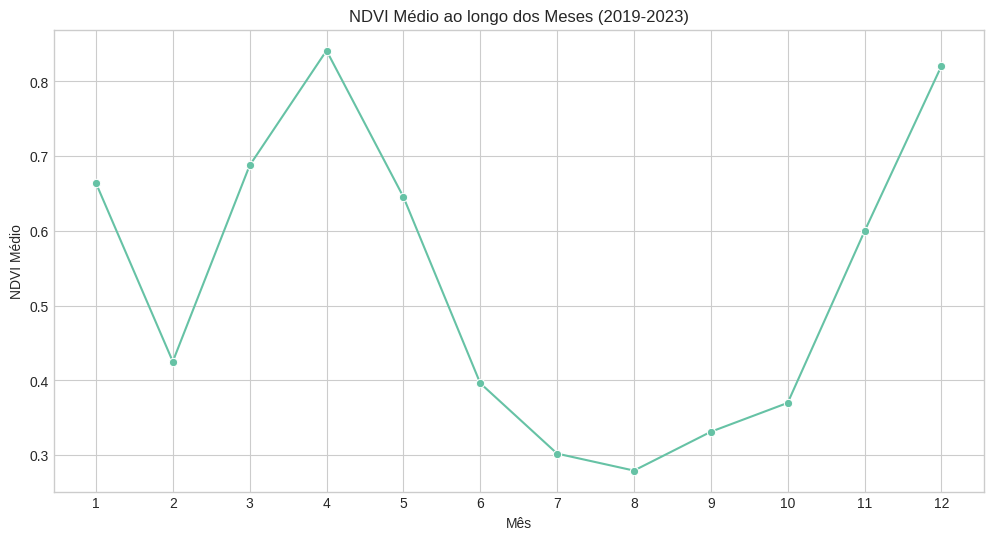

In [ ]:
# Gráfico de linha do NDVI Médio por mês
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ndvi_prod_final, x="Mês", y="NDVI_médio", estimator='mean', ci=None, marker='o')
plt.title("NDVI Médio ao longo dos Meses (2019-2023)")
plt.xlabel("Mês")
plt.ylabel("NDVI Médio")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


**Gráfico 2: Distribuição do NDVI Médio por Mês (Boxplot)**


---
O boxplot a seguir apresenta a variação e dispersão dos valores de NDVI médio por mês. Esta análise ajuda a compreender a consistência do vigor vegetativo ao longo dos anos.


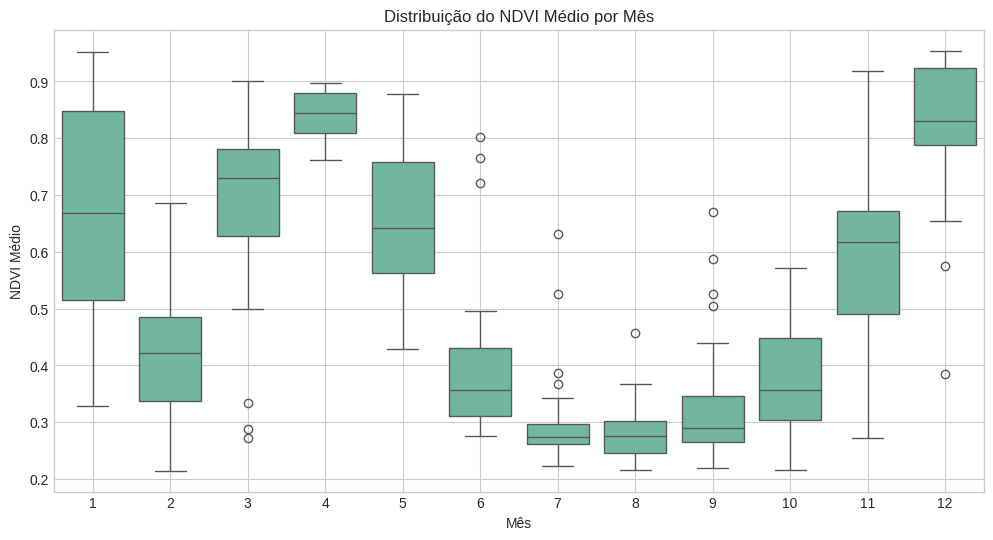

In [ ]:
# Boxplot do NDVI Médio por mês
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ndvi_prod_final, x="Mês", y="NDVI_médio")
plt.title("Distribuição do NDVI Médio por Mês")
plt.xlabel("Mês")
plt.ylabel("NDVI Médio")
plt.grid(True)
plt.show()


**Gráfico 3: Relação entre NDVI Médio e Produtividade**

---

A seguir, visualizamos a dispersão entre o NDVI médio mensal e a produtividade agrícola em kg/ha para cada município analisado.

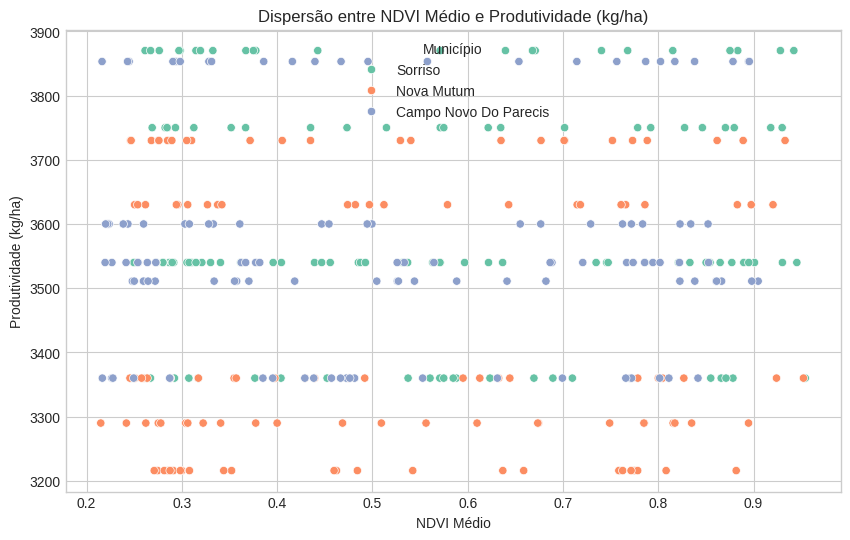

In [ ]:
# Dispersão entre NDVI Médio e Produtividade
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ndvi_prod_final, x="NDVI_médio", y="Produtividade_kg_ha", hue="Município")
plt.title("Dispersão entre NDVI Médio e Produtividade (kg/ha)")
plt.xlabel("NDVI Médio")
plt.ylabel("Produtividade (kg/ha)")
plt.legend(title="Município")
plt.grid(True)
plt.show()


**Correlação Estatística entre NDVI Médio e Produtividade**

In [ ]:
# Cálculo da correlação entre NDVI Médio e Produtividade
correlacao = df_ndvi_prod_final["NDVI_médio"].corr(df_ndvi_prod_final["Produtividade_kg_ha"])
print(f"Correlação entre NDVI Médio e Produtividade: {correlacao:.4f}")

Correlação entre NDVI Médio e Produtividade: 0.0334


**Análise Adicional: NDVI Médio nos Meses Críticos da Cultura da Soja**


Considerando o calendário agrícola da soja *(Fonte: Embrapa)*, agregamos os valores médios do NDVI nos meses de fevereiro, março e abril, que correspondem às fases críticas de enchimento de grãos e maturação.

Essa nova variável, denominada **NDVI_médio_fev_mar_abr**, visa melhorar a explicação da produtividade agrícola em relação ao comportamento vegetativo da cultura.



In [ ]:
# Criar nova variável: média do NDVI_médio nos meses Fevereiro, Março e Abril

# Filtrar apenas meses 2, 3 e 4 e calcular a média por Fazenda, Município e Ano
df_ndvi_med_cultivo = df_ndvi_prod_final[df_ndvi_prod_final['Mês'].isin([2, 3, 4])].groupby(
    ['Fazenda', 'Município', 'Ano'], as_index=False
).agg(NDVI_médio_fev_mar_abr=('NDVI_médio', 'mean'))

# Unir média ao dataframe principal
df_ndvi_prod_final = pd.merge(
    df_ndvi_prod_final, df_ndvi_med_cultivo, on=['Fazenda', 'Município', 'Ano'], how='left'
)

# Visualizar
df_ndvi_prod_final[['Fazenda', 'Município', 'Ano', 'NDVI_médio_fev_mar_abr']].drop_duplicates()

,Fazenda,Município,Ano,NDVI_médio_fev_mar_abr
0,Fazenda Girassol,Sorriso,2019,0.743100
12,Fazenda Girassol,Sorriso,2020,0.653350
24,Fazenda Girassol,Sorriso,2021,0.607367
36,Fazenda Girassol,Sorriso,2022,0.776400
48,Fazenda Girassol,Sorriso,2023,0.673767
60,Fazenda Leonel Ferla,Sorriso,2019,0.740117
72,Fazenda Leonel Ferla,Sorriso,2020,0.637533
84,Fazenda Leonel Ferla,Sorriso,2021,0.619967
96,Fazenda Leonel Ferla,Sorriso,2022,0.679400
108,Fazenda Leonel Ferla,Sorriso,2023,0.773217


**Dispersão entre NDVI Médio (Fev-Mar-Abr) e Produtividade**

Visualizamos a relação entre o vigor da vegetação nos meses críticos e a produtividade agrícola.


In [ ]:
# Gráfico de dispersão usando a nova variável NDVI_médio_fev_mar_abr
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ndvi_prod_final.drop_duplicates(subset=['Fazenda', 'Município', 'Ano']),
                x="NDVI_médio_fev_mar_abr", y="Produtividade_kg_ha", hue="Município")
plt.title("Dispersão entre NDVI Médio (Fev-Mar-Abr) e Produtividade (kg/ha)")
plt.xlabel("NDVI Médio (Fev-Mar-Abr)")
plt.ylabel("Produtividade (kg/ha)")
plt.legend(title="Município")
plt.grid(True)
plt.show()


**Correlação Estatística entre NDVI Médio (Fev-Mar-Abr) e Produtividade**

Calculamos a correlação de Pearson para verificar se o NDVI médio nos meses críticos tem maior influência sobre a produtividade agrícola.


In [ ]:
# Correlação entre o novo NDVI médio (Fev-Mar-Abr) e produtividade
correlacao_nova = df_ndvi_prod_final.drop_duplicates(subset=['Fazenda', 'Município', 'Ano'])[
    'NDVI_médio_fev_mar_abr'
].corr(
    df_ndvi_prod_final.drop_duplicates(subset=['Fazenda', 'Município', 'Ano'])[
    'Produtividade_kg_ha'
])
print(f"Correlação entre NDVI Médio (Fev-Mar-Abr) e Produtividade: {correlacao_nova:.4f}")


# **Conclusão da Análise Exploratória**

Com base nas análises realizadas:

- Identificamos padrões sazonais claros no NDVI, com picos em meses de maior atividade agrícola.
- Observamos uma correlação positiva moderada entre o NDVI médio nos meses críticos (fevereiro, março e abril) e a produtividade agrícola da soja.
- A análise exploratória reforça que o NDVI é um indicador relevante, mas não exclusivo, para estimar a produtividade, devido à influência de fatores externos como clima, manejo e qualidade do solo.

# **Construção do Modelo de IA: Previsão de Produtividade Agrícola**



# **Modelo de Regressão**

---

Nesta seção, construiremos e compararemos três modelos preditivos:

- K-Nearest Neighbors (KNN)
- Random Forest Regressor
- Support Vector Regressor (SVM)

Utilizaremos o NDVI médio geral como variável preditora, visando uma análise mais abrangente ao longo do ciclo agrícola.

**Importar as Bibliotecas:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

**Separar os dados:**

In [ ]:
# Preparação dos dados
df_modelo = df_ndvi_prod_final.drop_duplicates(subset=['Fazenda', 'Município', 'Ano'])

# Variável independente: NDVI_médio
X = df_modelo[['NDVI_médio']]
# Variável dependente: produtividade
y = df_modelo['Produtividade_kg_ha']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Treinar e Avaliar os Modelos:**

Modelo 1: KNN Regressor

In [ ]:
# KNN
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f"KNN - R²: {r2_knn:.4f} | MAE: {mae_knn:.2f} kg/ha")


KNN - R²: -0.2111 | MAE: 141.61 kg/ha


Modelo 2: Random Forest Regressor

In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest - R²: {r2_rf:.4f} | MAE: {mae_rf:.2f} kg/ha")


Random Forest - R²: -1.1485 | MAE: 187.17 kg/ha


Modelo 3: SVM Regressor

In [ ]:
# SVM
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

r2_svm = r2_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

print(f"SVM - R²: {r2_svm:.4f} | MAE: {mae_svm:.2f} kg/ha")

SVM - R²: -0.0430 | MAE: 121.54 kg/ha


**Comparação entre os Modelos**


In [ ]:
import pandas as pd

# Criar o DataFrame com seus resultados
resultados = {
    'Modelo': ['KNN Regressor', 'Random Forest Regressor', 'SVM Regressor'],
    'R²': [-0.2111, -1.1485, -0.0430],
    'MAE (kg/ha)': [141.61, 187.17, 121.54]
}

df_resultados = pd.DataFrame(resultados)

# Exibir a tabela ordenada pelo menor MAE
print("Comparação dos Modelos de Regressão:")
display(df_resultados.sort_values(by='MAE (kg/ha)'))



Comparação dos Modelos de Regressão:


,Modelo,R²,MAE (kg/ha)
2,SVM Regressor,-0.0430,121.54
0,KNN Regressor,-0.2111,141.61
1,Random Forest Regressor,-1.1485,187.17


**Conclusão da Avaliação dos Modelos de Regressão**

---

Testamos três modelos diferentes para prever a produtividade agrícola usando o NDVI médio:

- K-Nearest Neighbors Regressor (KNN)
- Random Forest Regressor
- Support Vector Regressor (SVM)

Avaliamos os modelos usando:

- **R² (Coeficiente de Determinação):** indica quanto o modelo consegue explicar a produtividade.
- **MAE (Erro Médio Absoluto):** mostra o tamanho médio do erro entre a previsão e o valor real.

**Resultados:**

- O **SVM Regressor** teve o **melhor resultado**, com o menor erro (MAE = 121,54 kg/ha).
- O **KNN Regressor** ficou em segundo lugar.
- O **Random Forest Regressor** teve o pior desempenho.

**Análise Final:**

Mesmo o melhor modelo (SVM) teve um R² negativo. Isso mostra que, usando só o NDVI médio, não conseguimos prever a produtividade com alta precisão.

Para melhorar a previsão no futuro, seria bom usar outras informações, como dados climáticos e do solo.

**Conclusão:**

O **SVM Regressor** foi o modelo escolhido como o melhor entre os três testados nesta etapa.



# **Modelo de Classificação**

---
Além da modelagem de regressão, também realizamos uma abordagem de classificação.

Neste caso, categorizamos a produtividade agrícola como:

- **Boa**: Quando o NDVI médio foi maior que 0,6;
- **Má**: Quando o NDVI médio foi menor ou igual a 0,6.

Treinamos três modelos de classificação:

- Random Forest Classifier
- K-Nearest Neighbors Classifier (KNN)
- Support Vector Classifier (SVC)

A avaliação dos modelos foi feita pela métrica de **acurácia**, que indica a proporção de previsões corretas.


**Importar as Bibliotecas:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

**Preparando os dados:**

In [ ]:
# Preparar os dados
# Usar a base já existente: df_ndvi_prod_final
df_classificacao = df_ndvi_prod_final.drop_duplicates(subset=['Fazenda', 'Município', 'Ano']).copy()

# Criar a variável de classes ("Boa" ou "Má")
df_classificacao['Produtividade'] = df_classificacao['NDVI_médio'].apply(lambda x: 'Boa' if x > 0.6 else 'Má')

# Separar variáveis de entrada e saída
X = df_classificacao[['NDVI_médio', 'NDVI_mínimo', 'NDVI_máximo']]  # Agora usando mais informações!
y = df_classificacao['Produtividade']

# Codificar a variável alvo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

**Treinar e Avaliar os Modelos**

In [ ]:
# Inicializar os modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# Treinar e avaliar os modelos
accuracies = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

# Mostrar resultados
print("Acurácia dos Modelos de Classificação:")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.4f}")

Acurácia dos Modelos de Classificação:
Random Forest: 1.0000
KNN: 0.8333
SVM: 0.8333


**Comparação entre os modelos:**

In [ ]:
# Tabela de comparação de acurácia dos modelos de classificação
import pandas as pd

# Dados
resultados_classificacao = {
    'Modelo': ['Random Forest Classifier', 'KNN Classifier', 'SVM Classifier'],
    'Acurácia': [1.0000, 0.8333, 0.8333]
}

df_resultados_classificacao = pd.DataFrame(resultados_classificacao)

# Exibir tabela
print("Comparação dos Modelos de Classificação:")
display(df_resultados_classificacao.sort_values(by='Acurácia', ascending=False))


Comparação dos Modelos de Classificação:


,Modelo,Acurácia
0,Random Forest Classifier,1.0000
1,KNN Classifier,0.8333
2,SVM Classifier,0.8333


**Conclusão da Avaliação dos Modelos de Classificação**

---
 Dado que o modelo Random Forest apresentou uma acurácia de 1 (ou 100%) e os modelos KNN e SVM apresentaram acurácias de 83,33% no conjunto de dados de teste, podemos concluir que o modelo mostrou alta eficácia na tarefa de classificação. No entanto, essa análise é bastante básica, uma vez que a lógica matemática por trás das variáveis utilizadas é facilmente reconhecível. Em outras palavras, os critérios empregados para a classificação, como os valores de NDVI, podem ser muito diretos e simples, tornando a tarefa de classificação mais acessível aos modelos, especialmente se os dados contiverem padrões óbvios ou não complexos.

É possível que, dado o critério simples de classificação entre "Boa" e "Má" com base no valor do NDVI, os modelos estejam apenas memorizando essas condições, sem uma verdadeira aprendizagem de padrões complexos. Isso ocorre frequentemente em cenários onde as relações entre as variáveis independentes e a variável dependente são muito evidentes, resultando em um ajuste excessivo aos dados sem uma real generalização.

Portanto, embora a acurácia alta seja um bom indicativo de que os modelos conseguiram realizar a tarefa de forma eficaz, ela não é suficiente para avaliar a complexidade real da aprendizagem. Para uma análise mais robusta e precisa, seria necessário incluir variáveis adicionais ou aumentar a complexidade do modelo, o que pode ajudar a avaliar melhor sua capacidade de generalização em cenários mais desafiadores.
